<a href="https://colab.research.google.com/github/GauthierBrancart/dotfiles/blob/master/Geocars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import geopandas as gpd

In [170]:
import matplotlib as plt

In [171]:
import pandas as pd

In [172]:
belgium = gpd.read_file("/content/sample_data/Municipalities/communes_L08.shp")

<Axes: >

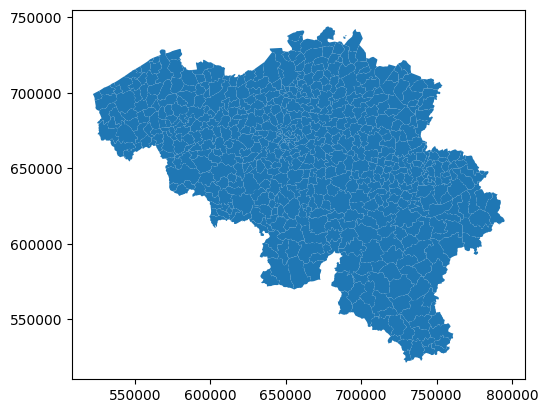

In [173]:
# Plot the map
belgium.plot()

In [174]:
# 2. Load the sales data from your CSV file
sales_data = pd.read_csv("/content/sample_data/Data_sales/used_new_codepostal.csv")

In [175]:
postcodes = pd.read_csv("/content/sample_data/Postal_code/Postal_code.csv", sep=';', usecols=[0, 1])  # Assuming columns 0 and 1 are Postal code and Gemeentenaam
print(postcodes)

      Postal code   Gemeentenaam
0            1000        Brussel
1            1020        Brussel
2            1030     Schaarbeek
3            1040        Brussel
4            1040      Etterbeek
...           ...            ...
1147         9982  Sint-Laureins
1148         9988  Sint-Laureins
1149         9990       Maldegem
1150         9991       Maldegem
1151         9992       Maldegem

[1152 rows x 2 columns]


In [176]:
# 3. Preprocess the sales data to filter based on conditions
# Liste des valeurs à conserver
valeurs_a_garder = ['TOYOTA TOYOTA AYGO X', 'TOYOTA AYGO X', 'AYGO X']

# Filtrer les lignes où la colonne 'ALIBMAMO' contient une des valeurs à garder et où 'ACNEWOCC' est 'N'
filtered_sales_data = sales_data[(sales_data['ALIBMAMO'].isin(valeurs_a_garder)) & (sales_data['ACNEWOCC'] == 'N')]

print(filtered_sales_data)

        DYEARMUT  DMTHMUT ACVPVI ACPRICOM ACMODEL ACMAKE  ACPOST4  \
565         2023   202305     VP        P   AABBR   8520     1410   
1124        2023   202302     VP        P   AABBR   8520     7100   
2664        2023   202303     VP        P   AABBR   8520     5310   
2962        2023   202304     VP        P   AABBR   8520     9140   
4201        2023   202302     VP        P   AABBR   8520     1350   
...          ...      ...    ...      ...     ...    ...      ...   
947313      2023   202311     VP        P   AABBR   8520     6692   
947983      2023   202308     VP        P   AABBR   8520     4400   
948215      2023   202305     VP        P   AABBR   8520     6900   
948268      2023   202305     VP        P   AABBR   8520     1703   
948417      2023   202307     VP        C   AABBR   8520     1932   

        Count_of_NALGFEBD              ALIBMAMO ACNEWOCC    Region  
565                     1  TOYOTA TOYOTA AYGO X        N  Wallonie  
1124                    1        

In [177]:
# Filtrer les lignes où la colonne "ACPOST4" a pour valeur 2000
filtered_rows = filtered_sales_data[filtered_sales_data['ACPOST4'] == 2000]

# Vérifier si des lignes correspondent à votre filtre
if not filtered_rows.empty:
    # Obtenir la valeur de la colonne "Count_of_NALGFEBD" pour la première occurrence
    count_value = filtered_rows['Count_of_NALGFEBD'].iloc[0]

    # Imprimer la valeur de la colonne "Count_of_NALGFEBD" pour ACPOST4 égal à 2000
    print("La valeur de la colonne 'Count_of_NALGFEBD' pour ACPOST4 égal à 2000 est :", count_value)
else:
    print("Aucune ligne ne correspond au critère de filtrage.")


La valeur de la colonne 'Count_of_NALGFEBD' pour ACPOST4 égal à 2000 est : 1


In [178]:
merged_data = pd.merge(filtered_sales_data, postcodes, how='left', left_on=sales_data.columns[6], right_on=postcodes.columns[0])

In [179]:
print(merged_data.columns)

Index(['DYEARMUT', 'DMTHMUT', 'ACVPVI', 'ACPRICOM', 'ACMODEL', 'ACMAKE',
       'ACPOST4', 'Count_of_NALGFEBD', 'ALIBMAMO', 'ACNEWOCC', 'Region',
       'Postal code', 'Gemeentenaam'],
      dtype='object')


In [180]:
print(merged_data['Gemeentenaam'] == 'Antwerpen')

0       False
1       False
2       False
3       False
4       False
        ...  
1530    False
1531    False
1532    False
1533    False
1534    False
Name: Gemeentenaam, Length: 1535, dtype: bool


In [181]:
# Additionner les ventes par commune
sales_by_municipality = merged_data.groupby('Gemeentenaam')['Count_of_NALGFEBD'].sum().reset_index()

# Renommer la colonne pour refléter le total des ventes
sales_by_municipality.rename(columns={'Count_of_NALGFEBD': 'Total_sales'}, inplace=True)

# Afficher les ventes par commune
print(sales_by_municipality)


        Gemeentenaam  Total_sales
0              Aalst           16
1             Aalter            1
2             Aarlen            5
3           Aarschot            4
4         Aartselaar            3
..               ...          ...
421        Zutendaal            1
422            Zwalm            1
423         Zwevegem            1
424      Zwijndrecht            2
425  ’s Gravenbrakel            2

[426 rows x 2 columns]


In [182]:
# Fusionner les deux bases de données en utilisant la colonne 'Gemeentenaam' et 'Name'
belgium_sales = belgium.merge(sales_by_municipality, how='left', left_on='Name', right_on='Gemeentenaam')

# Supprimer la colonne 'Gemeentenaam' après la fusion
belgium_sales.drop(columns=['Gemeentenaam'], inplace=True)

# Renommer la colonne 'Total_sales' en 'sales'
belgium_sales.rename(columns={'Total_sales': 'sales'}, inplace=True)

# Afficher la nouvelle base de données fusionnée
print(belgium_sales)


              Name    NSI                                           geometry  \
0       Aartselaar  11001  POLYGON ((652182.591 704480.416, 652178.267 70...   
1        Antwerpen  11002  POLYGON ((649863.240 727423.314, 649391.917 72...   
2         Boechout  11004  POLYGON ((661185.159 708967.442, 661195.898 70...   
3             Boom  11005  POLYGON ((651079.098 696759.576, 651012.626 69...   
4         Borsbeek  11007  POLYGON ((659697.241 708876.389, 659693.637 70...   
..             ...    ...                                                ...   
584        Doische  93018  POLYGON ((679322.243 599054.467, 679319.452 59...   
585      Florennes  93022  POLYGON ((665576.621 612346.457, 665642.552 61...   
586  Philippeville  93056  POLYGON ((662196.969 601697.465, 662466.767 60...   
587       Walcourt  93088  POLYGON ((660517.948 611586.820, 660536.035 61...   
588      Viroinval  93090  POLYGON ((675033.278 587965.467, 675030.427 58...   

     sales  
0      3.0  
1     33.0  


In [183]:
# Chercher l'index de la ligne où la colonne "Name" est "Zaventem"
index_zaventem = belgium_sales.index[belgium_sales['Name'] == 'Zaventem']

# Vérifier si l'index de Zaventem est trouvé
if not index_zaventem.empty:
    # Imprimer la valeur actuelle de la colonne "sales" pour Zaventem
    print("La valeur actuelle de la colonne 'sales' pour Zaventem est :", belgium_sales.loc[index_zaventem, 'sales'].values[0])
else:
    print("Zaventem n'a pas été trouvé dans la base de données.")

La valeur actuelle de la colonne 'sales' pour Zaventem est : 387.0


In [184]:
# Chercher l'index de la ligne où la colonne 0 (Gemeentenaam) est "Brussel"
index_brussel = belgium_sales.index[belgium_sales['Name'] == 'Zaventem']

# Modifier la valeur de la colonne "sales" à 25
belgium_sales.loc[index_brussel, 'sales'] = 45

In [164]:
print(belgium_sales)

              Name    NSI                                           geometry  \
0       Aartselaar  11001  POLYGON ((652182.591 704480.416, 652178.267 70...   
1        Antwerpen  11002  POLYGON ((649863.240 727423.314, 649391.917 72...   
2         Boechout  11004  POLYGON ((661185.159 708967.442, 661195.898 70...   
3             Boom  11005  POLYGON ((651079.098 696759.576, 651012.626 69...   
4         Borsbeek  11007  POLYGON ((659697.241 708876.389, 659693.637 70...   
..             ...    ...                                                ...   
584        Doische  93018  POLYGON ((679322.243 599054.467, 679319.452 59...   
585      Florennes  93022  POLYGON ((665576.621 612346.457, 665642.552 61...   
586  Philippeville  93056  POLYGON ((662196.969 601697.465, 662466.767 60...   
587       Walcourt  93088  POLYGON ((660517.948 611586.820, 660536.035 61...   
588      Viroinval  93090  POLYGON ((675033.278 587965.467, 675030.427 58...   

     sales  
0      3.0  
1     33.0  


In [185]:
# Trouver l'index de la ligne où la colonne "Name" est "Antwerpen"
index_antwerpen = belgium_sales.index[belgium_sales['Name'] == 'Antwerpen']

# Imprimer la valeur de la cellule "sales" pour cette ligne
print("La valeur de la cellule 'sales' pour Antwerpen est :", belgium_sales.loc[index_antwerpen, 'sales'].values[0])


La valeur de la cellule 'sales' pour Antwerpen est : 33.0


In [188]:
# Chercher l'index de la ligne où la colonne 0 (Gemeentenaam) est "Brussel"
index_brussel = belgium_sales.index[belgium_sales['Name'] == 'Machelen']

# Modifier la valeur de la colonne "sales" à 25
belgium_sales.loc[index_brussel, 'sales'] = 45
# Limiter toutes les valeurs de la colonne "sales" à un maximum de 35
belgium_sales['sales'] = belgium_sales['sales'].clip(upper=20)


<Axes: >

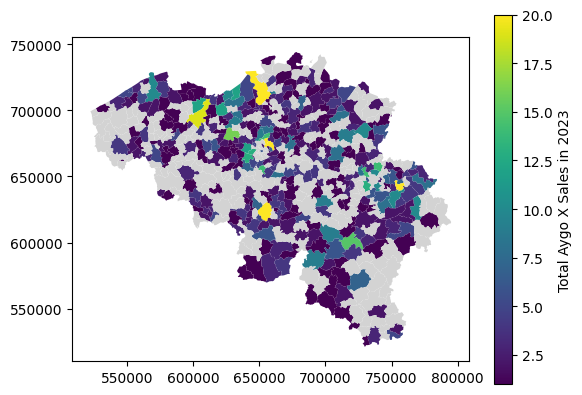

In [189]:
# Tracer la carte avec un label à la légende
belgium_sales.plot(column='sales', legend=True, legend_kwds={"label": "Total Aygo X Sales in 2023"}, missing_kwds={'color': 'lightgrey'})